In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.datasets as datasets

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Class'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


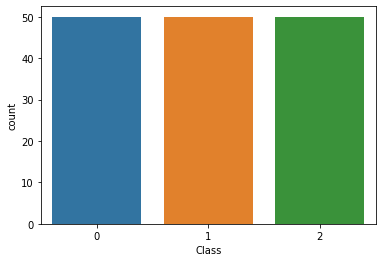

In [6]:
sns.countplot(iris_df['Class'])
plt.show()

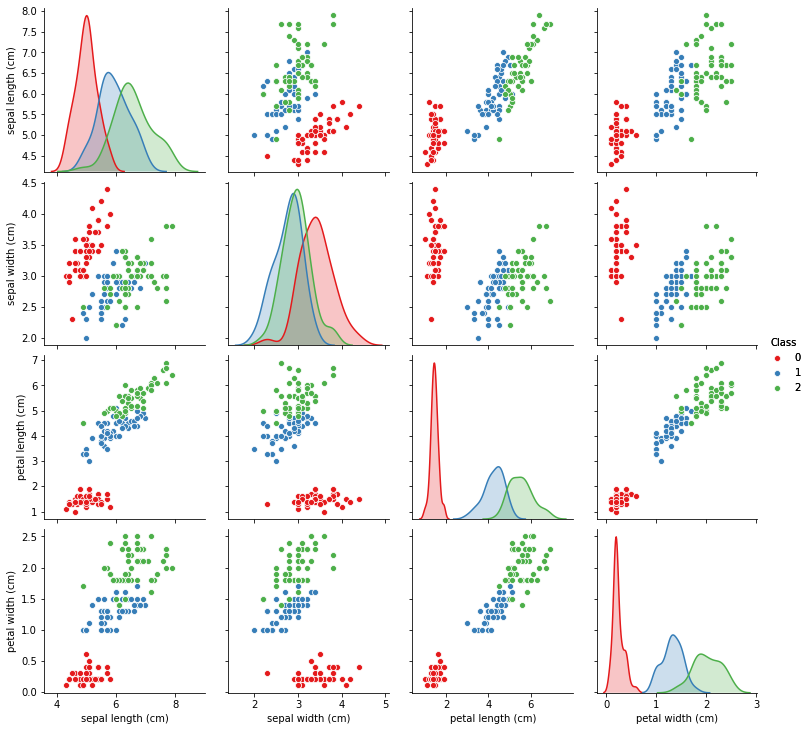

In [7]:
sns.pairplot(iris_df,hue='Class',palette='Set1').add_legend()

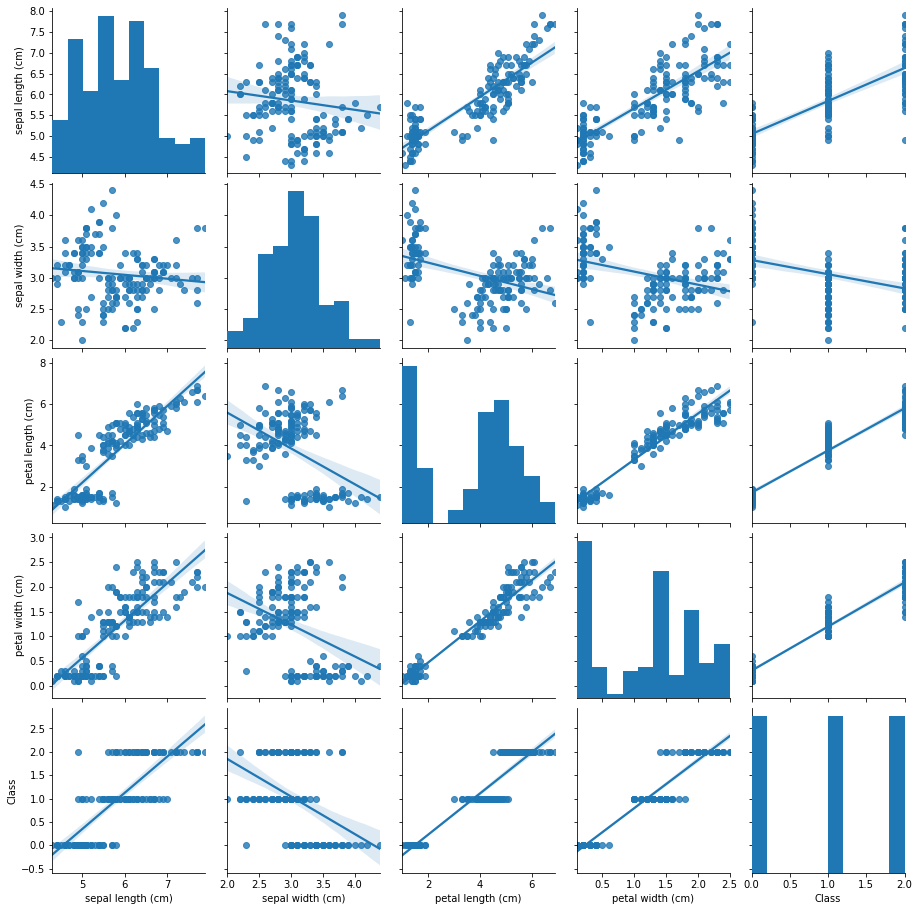

In [8]:
sns.pairplot(iris_df, kind="reg")
plt.show()

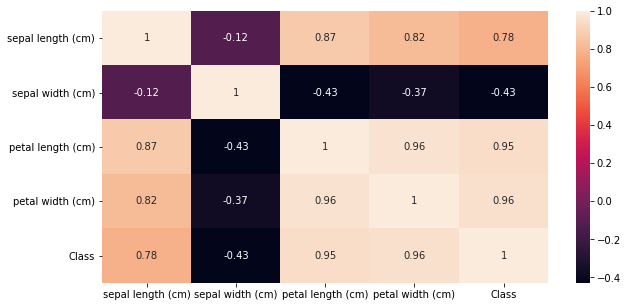

In [9]:
num_feat = iris_df.select_dtypes(include=np.number).columns
plt.figure(figsize= (10, 5))
sns.heatmap(iris_df.corr(), annot=True)
plt.show()

In [10]:
X = iris.data
y = iris.target

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [12]:
giniDecisionTree = DecisionTreeClassifier(criterion = 'gini')
model = giniDecisionTree.fit(X, y)

In [13]:
giniPred = model.predict(X)
print('Accuracy Score: ',accuracy_score(y, giniPred))

Accuracy Score:  1.0


In [14]:
print('Classification Report')
print(classification_report(y, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [17]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy')
model1 = entropyDecisionTree.fit(X, y)

In [18]:
entropyPred = model1.predict(X)
print('Accuracy Score: ',accuracy_score(y, entropyPred))

Accuracy Score:  1.0


In [19]:
print('Classification Report')
print(classification_report(y, entropyPred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [20]:
X_test = [(5.5,4.2,2.9,0.7)]
class_pred = model.predict(X_test)
print(class_pred)

[0]


In [21]:
X_test = [(5.5,4.2,2.9,0.7)]
class_pred = model1.predict(X_test)
print(class_pred)

[1]


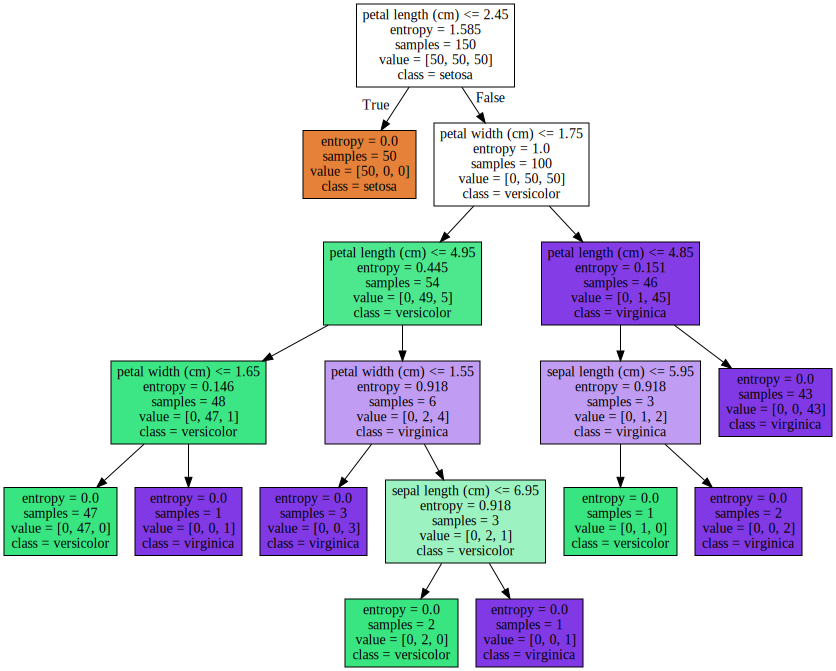

In [23]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model1, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph